
## 6.2.2 Aufgaben<a id='aufgaben'></a> 




## Projekt zur Modellierung von Themen und Clustering von Dokumenten 

### Hintergrund
Eine besonders häufig auf Textdaten angewandte Technik ist die *Modellierung von Themen*, ein Oberbegriff für die Aufgabe, jedes Dokument einem oder mehreren Themen zuzuordnen - für gewöhnlich unüberwacht. Ein gutes Beispiel hierfür sind Daten zu Nachrichten, die sich in Themengebiete wie »Politik«, »Sport«, »Wirtschaft« usw. kategorisieren lassen. Wenn jedes Dokument einem einzelnen Thema zugeordnet wird, ist dies eine Clustering-Aufgabe, ähnlich denen in Modul 4. Wenn jedes Dokument zu mehr als einem Thema gehören kann, gehört die Aufgabe zu den Methoden zur Komponentenzerlegung aus Modul 4. Jede der ermittelten Komponenten bildet dann ein Thema, und die Koeffizienten der Komponenten in der Repräsentation eines Dokuments geben an, wie stark dieses Dokument zu einem bestimmten Thema gehört. Wenn man über das Modellieren von Themen spricht, geht es meist um eine bestimmte Methode zur Dekomposition namens *Latent Dirichlet Allocation* (kurz LDA).

### Latent Dirichlet Allocation  (LDA)
Intuitiv versucht das LDA-Modell, Gruppen von Wörtern (die Themen) zu finden, die häufig gemeinsam auftreten. LDA geht außerdem davon aus, dass jedes Dokument als »Mischung« einer Untermenge aller Themen aufgefasst wird. Es ist wichtig zu verstehen, dass für ein maschinelles Lernmodell ein »Thema« nicht das gleiche ist wie in der Alltagssprache, sondern eher den von einer Hauptkomponentenzerlegung ermittelten Komponenten entspricht (welche wir in Modul 4 besprochen haben). Diese Themen können eine Bedeutung haben, müssen es aber nicht. Sogar wenn es für ein »Thema« aus der LDA eine Bedeutung gibt, ist es nicht unbedingt das, was wir als Thema bezeichnen würden. Beim Nachrichtenbeispiel könnten wir also eine Sammlung von Artikeln über Sport, Politik und Wirtschaft von zwei bestimmten Journalisten haben. In einem Artikel über Politik würden wir Wörter wie »Ministerpräsident«, »abstimmen«, »Partei« usw. erwarten, in einem Sportartikel dagegen Wörter wie »Mannschaft«, »Punkte« und »Saison«. Wörter aus diesen Gruppen treten wahrscheinlicher gemeinsam auf. Dagegen ist es unwahrscheinlicher, dass »Mannschaft« und »Ministerpräsident« gemeinsam vorkommen. Dies sind allerdings nicht die einzigen Gruppen von Wörtern, die gemeinsam auftreten können. Die zwei Journalisten könnten unterschiedliche Phrasen oder Wortwahlen bevorzugen. Beispielsweise könnte der eine gerne das Wort »demarkieren« verwenden, der andere das Wort »polarisieren«. Weitere »Themen« wären dann »von Journalist A häufig verwendete Wörter« und »von Journalist B häufig verwendete Wörter«, auch wenn diese keine Themen im eigenlichen Sinn darstellen. 

In diesem Aufgabenabschnitt wollen wir die LDA auf unseren **Datensatz von Filmbewertungen** anwenden, um sie in Aktion zu sehen. Bevor du dich den nachfolgenden Aufgaben zuwendest, tue bitte Folgendes:

[1] Schaue dir bitte die API zur Klasse `LatentDirichletAllocation` an, die du [hier](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html?highlight=lda) findest. 

[2] Werfe auch einen Blick in den `Scikit-Learn` User Guide Eintrag zur [LDA](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation).

[3] Lese mindestens eine der folgenden weiterführenden Quellen:

- https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 


- https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html


- https://www.analyticsvidhya.com/blog/2021/06/part-3-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/


Bei unüberwachten Modellen für Textdokumente ist es meist hilfreich, sehr häufige Wörter zu entfernen, da diese sonst die Analyse dominieren können.

**Aufgabe A.1: Entferne Wörter, die in mindestens 15 Prozent der Dokumente auftreten, und limitiere das Bag-of-Words-Modell auf die nach Entfernen der obersten 15 Prozent häufigsten 10000 Wörter.**

In [1]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
# load_files liefert ein bunch Objekt mit Texten und Kategorien
text_train, y_train = reviews_train.data, reviews_train.target
print("Typ von text_train: {}".format(type(text_train)))
print("Länge von text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

Typ von text_train: <class 'list'>
Länge von text_train: 75000
text_train[6]:
b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Vorbereitung des CountVectorizer, um Wörter zu entfernen, die in mindestens 15% der Dokumente vorkommen
# und die Vokabulargröße auf die obersten 10000 Wörter zu limitieren
vect = CountVectorizer(max_df=0.15, max_features=10000)

# Anwenden des Vectorizers auf den Trainingsdatensatz
X_train = vect.fit_transform(text_train)

print("Größe von X_train: {}".format(X_train.shape))
# Dies zeigt die Dimension des Bag-of-Words-Modells an, welches die Anforderungen erfüllt

Größe von X_train: (75000, 10000)


**Aufgabe A.2: Trainiere ein LDA-Modell mit zehn Themen, was ausreichend wenige sind, sodass wir sie uns alle später ansehen können. Die Themen haben dabei keine inhärente Reihenfolge, und das Ändern der Anzahl von Themen verändert sämtliche Themen. Verwende die Lernmethode "batch", die etwas langsamer ist als die Standardeinstellung ("online"), aber üblicherweise zu besseren Ergebnissen führt. Erhöhe außerdem "max_iter", was ebenfalls das Modell verbessert.**

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialisierung des LDA-Modells
lda = LatentDirichletAllocation(n_components=10,     # Anzahl der Themen
                                learning_method='batch',
                                max_iter=10,         # Kann je nach Bedarf erhöht werden für bessere Ergebnisse
                                random_state=0)

# Training des LDA-Modells mit dem Bag-of-Words-Modell
lda.fit(X_train)


LatentDirichletAllocation(random_state=0)

Wie die Methoden zur Zerlegung in Modul 4 besitzt `LatentDirichletAllocation` das Attribut `components_`, in dem die Wichtigkeit jedes Wortes für jedes Thema abgelegt ist. 

**Aufgabe A.3: Wie lautet die Größe von `components_`?**


In [8]:
lda.components_.shape

(10, 10000)

**Aufgabe A.4: Um die Bedeutung der unterschiedlichen Themen besser zu verstehen, betrachte nun die wichtigsten zehn Wörter für jedes der Themen. (*Hinweis:* Die Funktion `print_topics` formatiert diese Merkmale ansprechend).**


In [9]:
# Anzeigen der Themen
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Thema %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vect.get_feature_names_out(), no_top_words)

Thema 0:
action 10 game lot effects pretty fun didn original special
Thema 1:
guy re pretty sex around nothing budget stupid worst actually
Thema 2:
us world war our american documentary history real country black
Thema 3:
show series episode tv family shows episodes funny children years
Thema 4:
didn actors worst book minutes am saw nothing thought actually
Thema 5:
director between work us real both may world own without
Thema 6:
horror original cast director gore quite doesn script isn dead
Thema 7:
funny comedy girl doesn guy gets going school want old
Thema 8:
young woman war death police wife father murder old later
Thema 9:
role john cast performance star years played plays actor screen


**Aufgabe A.5: Als Nächstes trainiere bitte ein weiteres Modell, diesmal mit 100 Themen. Mehr Themen erschweren die Analyse deutlich, es wird aber wahrscheinlicher, dass sich die Themen auf interessante Untermengen der Daten spezialisieren.**

In [10]:
lda100 = LatentDirichletAllocation(n_components=100,     # Anzahl der Themen
                                learning_method='batch',
                                max_iter=10,         # Kann je nach Bedarf erhöht werden für bessere Ergebnisse
                                random_state=0)

# Training des LDA-Modells mit dem Bag-of-Words-Modell
lda100.fit(X_train)

LatentDirichletAllocation(n_components=100, random_state=0)

**Aufgabe A.6: Da es etwas zu viel wäre, alle 100 Themen zeitgleich zu betrachten, wähle bitte einige interessante und repräsentative aus, z.B. die Themen 7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97. Zeige auch die jeweils 20 wichtigsten Wörter dieser Themen.**


In [14]:
# Angepasste Funktion, um nur ausgewählte Themen anzuzeigen
def print_selected_topics(model, feature_names, topics, no_top_words):
    for topic_idx in topics:
        topic = model.components_[topic_idx]
        message = "Thema #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)

# Liste der spezifischen Themen, die wir anzeigen möchten
selected_topics = [7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97]

# Anzeigen der 20 wichtigsten Wörter für die ausgewählten Themen
print_selected_topics(lda100, vect.get_feature_names_out(), selected_topics, 20)


Thema #7: allen woody rose chaplin new woman real wife screen tom husband york plays play roberts cassavetes work between nick himself
Thema #16: budget dvd low video production store copy quality effects special release vhs released find project cover look local re bought
Thema #24: italian cannibal franco virus jungle circus freaks tribe flesh apocalypse troll arms holocaust fulci dead infected jess homeless ernest chaney
Thema #25: island plane captain flight harvey pirates pirate airport disaster crash must airplane keitel lost farrah simpson leopard jules lewton fawcett
Thema #28: town western west sheriff mexican gold young westerns played small indians richard james gang american plays wild men old mr
Thema #36: vampire women devil demon girl vampires hot horror pretty sexy evil priest naked satan woman witch nudity looking price weird
Thema #37: game animation games play fantasy graphics video computer new animated played playing fun level voice final world adventure bourne 3d


**Aufgabe A.7: Sortiere das "Musikthema" 45 nach "Gewicht". Gib die zehn Dokumente aus, in denen das Thema am stärksten ausgeprägt ist. Zeige für diese Dokumente jeweils die ersten zwei Sätze.** 

In [17]:
import numpy as np

# Erhalten der Dokument-Thema-Matrix
document_topic_matrix = lda100.transform(X_train)

# Sortieren der Dokumente nach ihrer Zugehörigkeit zu Thema 45
topic_45_scores = document_topic_matrix[:, 45]
top_documents_indices = np.argsort(topic_45_scores)[::-1][:10]

# Anzeigen der ersten zwei Sätze der Top-10-Dokumente
for doc_index in top_documents_indices:
    doc_text = text_train[doc_index].decode('utf-8')  # Annahme, dass Text in bytecodiert vorliegt
    sentences = doc_text.split('.')[:2]  # Erste zwei Sätze, Annahme, dass Sätze durch Punkte getrennt sind
    print("Dokument {}:".format(doc_index))
    for sentence in sentences:
        print(sentence.strip() + '.')
    print("\n---\n")


Dokument 23488:
Che is a good film for chronicling the events leading to the Cuban Revolution and certainly has a mystic potency surrounding Che and his political ideals.
However there is no emotional core or compassionate deliverance to make this anything more than interesting, and is a friendly inspection of Che's mindset rather than anything inspiring.

---

Dokument 29866:
Smug and dull, Gere brings no sparkle and no real fear or tragedy and no-one else does any better.
Most minor parts simply one dimensional, certainly not simply xenophobic but somehow no better than that in its dull thoughtlessness and passionlessness.

---

Dokument 69511:
A superior work that takes itself seriously, but avoids the tiresome moralizing so often accompnaying American films of the same subject matter.
See it if you can.

---

Dokument 27364:
If you were to cut an hour of this movie you might have something a little bit entertaining, although even then I don't think you'd have anything memorable.
Bu

**Aufgabe A.8: Um eine andere interessante Perspektive zu erhalten, inspiziere bitte, wie viel Gewicht jedes Thema insgesamt erhält, indem du `document_topics` über alle Bewertungen aufsummieren. Benenne jedes Thema nach den zwei häufigsten Wörtern. Zeige die erlernten Gewichte in einer Abbildung.**

In [20]:
# Berechnen der summierten Gewichte für jedes Thema
topic_weights_sum = document_topic_matrix.sum(axis=0)

# Bestimmen der zwei häufigsten Wörter für jedes Thema
topic_names = []
for topic_idx, topic in enumerate(lda100.components_):
    top_words_indices = topic.argsort()[-2:]  # Die Indizes der zwei häufigsten Wörter
    top_words = [vect.get_feature_names_out()[i] for i in top_words_indices]
    topic_names.append((topic_idx, " ".join(top_words)))

# Sortieren der Themen nach ihrem summierten Gewicht
topics_sorted_by_weight = sorted(topic_names, key=lambda x: topic_weights_sum[x[0]], reverse=True)

# Anzeigen der Themen, benannt nach ihren zwei häufigsten Wörtern, und ihres summierten Gewichts
for topic in topics_sorted_by_weight:
    print("Thema {}: {} (Gesamtgewicht: {:.2f})".format(topic[0], topic[1], topic_weights_sum[topic[0]]))


Thema 99: nothing minutes (Gesamtgewicht: 3769.21)
Thema 89: waste worst (Gesamtgewicht: 2986.48)
Thema 74: saw gay (Gesamtgewicht: 2720.50)
Thema 20: give 10 (Gesamtgewicht: 2461.48)
Thema 35: quite lot (Gesamtgewicht: 2182.19)
Thema 86: stupid guy (Gesamtgewicht: 2164.57)
Thema 23: us art (Gesamtgewicht: 1917.10)
Thema 45: rather seems (Gesamtgewicht: 1780.93)
Thema 16: dvd budget (Gesamtgewicht: 1529.47)
Thema 30: performance role (Gesamtgewicht: 1482.07)
Thema 90: scary horror (Gesamtgewicht: 1480.23)
Thema 73: men women (Gesamtgewicht: 1472.78)
Thema 52: jokes funny (Gesamtgewicht: 1447.57)
Thema 88: old kids (Gesamtgewicht: 1350.10)
Thema 81: tv show (Gesamtgewicht: 1237.93)
Thema 57: us world (Gesamtgewicht: 1236.72)
Thema 6: cast script (Gesamtgewicht: 1233.80)
Thema 19: gets going (Gesamtgewicht: 1189.35)
Thema 59: thriller murder (Gesamtgewicht: 1119.83)
Thema 38: zombies zombie (Gesamtgewicht: 1080.00)
Thema 5: shots camera (Gesamtgewicht: 1049.42)
Thema 11: us questions (Ge

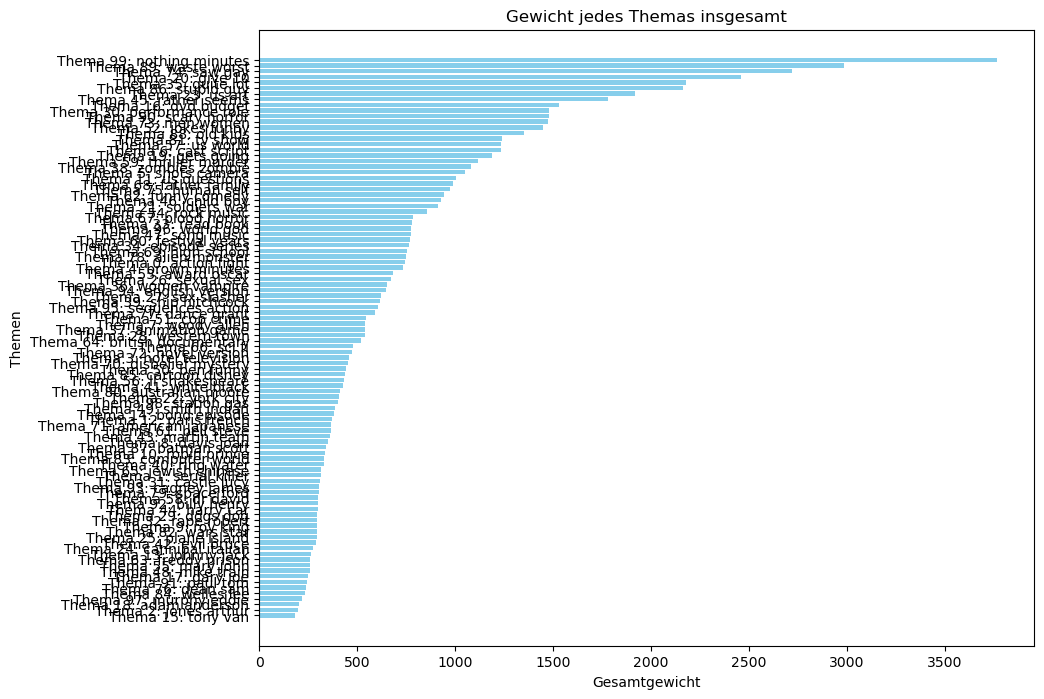

In [21]:
import matplotlib.pyplot as plt

# Erstellen von Listen für Themenbezeichnungen und ihre Gewichte
topic_labels = [f'Thema {topic[0]}: {topic[1]}' for topic in topics_sorted_by_weight]
topic_weights = [topic_weights_sum[topic[0]] for topic in topics_sorted_by_weight]

# Erstellen des Plots
plt.figure(figsize=(10, 8))
plt.barh(topic_labels, topic_weights, color='skyblue')
plt.xlabel('Gesamtgewicht')
plt.ylabel('Themen')
plt.title('Gewicht jedes Themas insgesamt')
plt.gca().invert_yaxis()  # Um die y-Achse umzukehren, damit das Thema mit dem höchsten Gewicht oben ist
plt.show()


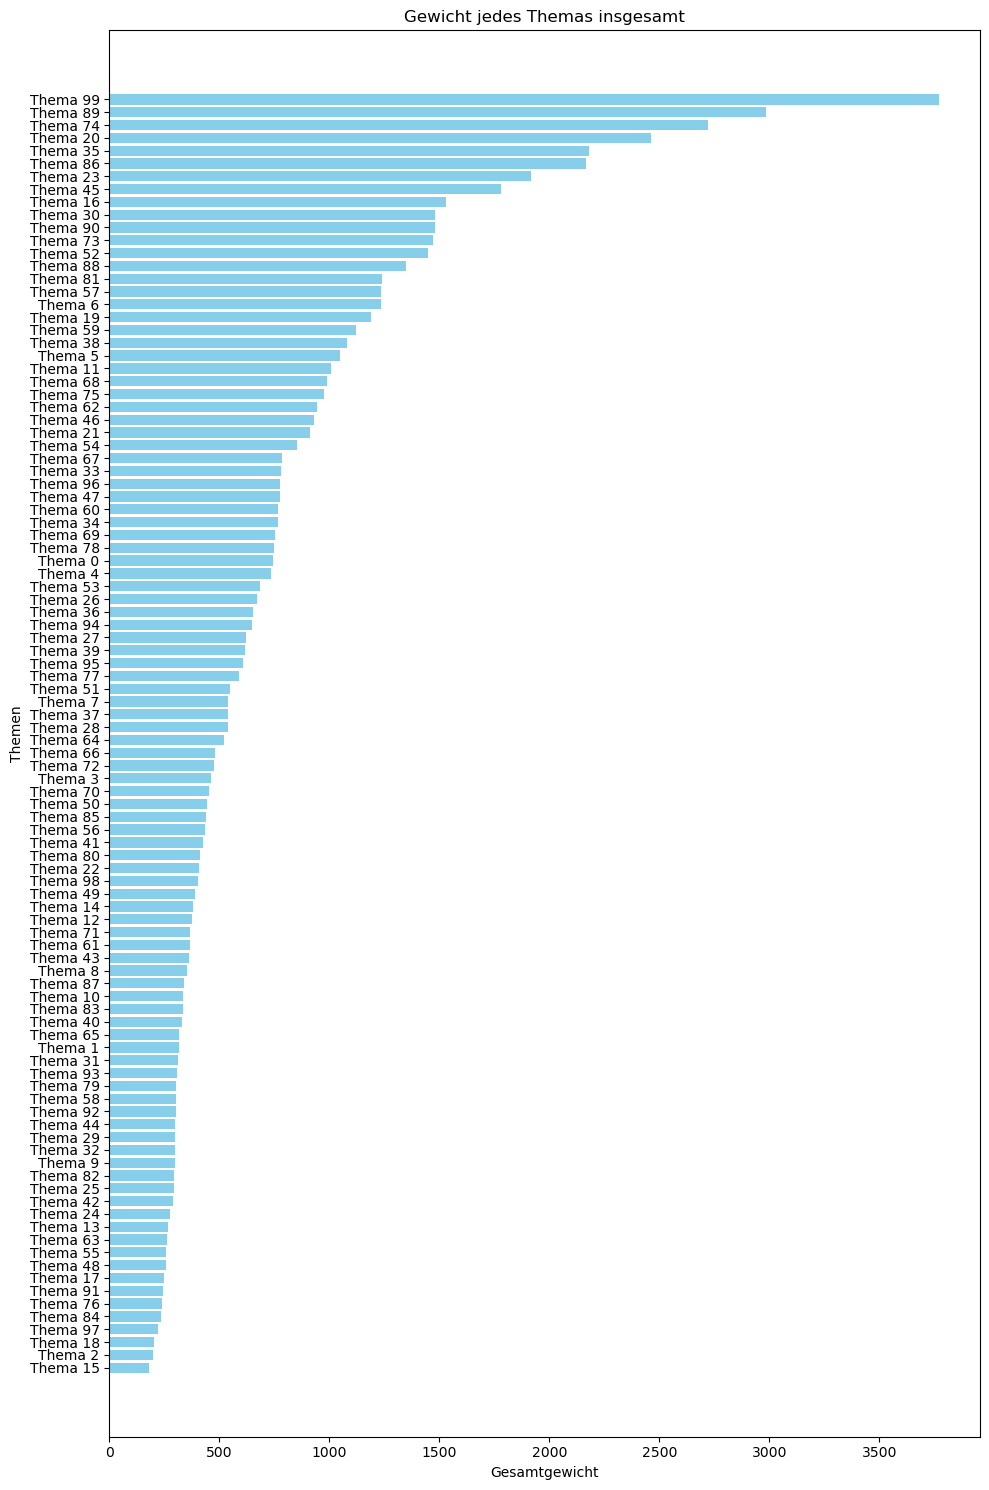

Thema 99: nothing minutes
Thema 89: waste worst
Thema 74: saw gay
Thema 20: give 10
Thema 35: quite lot
Thema 86: stupid guy
Thema 23: us art
Thema 45: rather seems
Thema 16: dvd budget
Thema 30: performance role
Thema 90: scary horror
Thema 73: men women
Thema 52: jokes funny
Thema 88: old kids
Thema 81: tv show
Thema 57: us world
Thema 6: cast script
Thema 19: gets going
Thema 59: thriller murder
Thema 38: zombies zombie
Thema 5: shots camera
Thema 11: us questions
Thema 68: father family
Thema 75: human self
Thema 62: funny comedy
Thema 46: child boy
Thema 21: soldiers war
Thema 54: rock music
Thema 67: blood horror
Thema 33: read book
Thema 96: world god
Thema 47: song music
Thema 60: festival years
Thema 34: episode series
Thema 69: high school
Thema 78: alien monster
Thema 0: action fight
Thema 4: brown minutes
Thema 53: award oscar
Thema 26: sexual sex
Thema 36: women vampire
Thema 94: english version
Thema 27: sex slasher
Thema 39: ship hitchcock
Thema 95: sequences action
Them

In [22]:
# Größe des Plots anpassen
plt.figure(figsize=(10, 15))  # Vergrößern für bessere Lesbarkeit

# Erstellen von verkürzten Labels nur mit der Thema-Nummer
short_topic_labels = [f'Thema {topic[0]}' for topic in topics_sorted_by_weight]

# Erstellen des Balkendiagramms mit verkürzten Labels
plt.barh(short_topic_labels, topic_weights, color='skyblue')
plt.xlabel('Gesamtgewicht')
plt.ylabel('Themen')
plt.title('Gewicht jedes Themas insgesamt')
plt.gca().invert_yaxis()  # Um die y-Achse umzukehren
plt.tight_layout()  # Verbessert die Anordnung
plt.show()

# Ausgabe der vollständigen Themenbezeichnungen neben dem Plot
for label in topic_labels:
    print(label)
